# Basic Arithmetic Operations with Polynomials

Once we construct a polynomial in Minterpy, depending on the basis in which the polynomial is represented, you can perform a variety of operations with it. As shown in the previous two guides, you can evaluate a Minterpy polynomial (in the Newton basis) on a set of query points.

This guide goes a step further by demonstrating that Minterpy polynomials can be added, subtracted, or multiplied, either with real scalar numbers or with other polynomials, resulting in another Minterpy polynomial (of the same basis). In other words, Minterpy polynomials are _closed under the following arithmetic operations_:

- polynomial-polynomial multiplication
- polynomial-scalar multiplication
- polynomial-polynomial addition and subtraction
- polynomial-scalar addition and subtraction
- exponentiation by a non-negative integer

In the following, one-dimensional polynomials are used for ease of visualization. However, the overall behavior of Minterpy polynomials, including arithmetic operations, remains the same.

Before you begin, you'll need to import the necessary packages to follow along with this guide.

In [1]:
import minterpy as mp
import numpy as np
import matplotlib.pyplot as plt

## Motivating functions

Consider the following two one-dimensional functions.

The first is the sine function:

$$
f_1(x) = \sin{(5 \pi x)}, x \in [-1, 1].
$$

You can define the above function as a lambda function in Python:

In [2]:
fun_1 = lambda xx: np.sin(5 * np.pi * xx)

Following the examples given in the {doc}`previous guide <one-dimensional-polynomial-interpolation>`, you can construct an interpolating polynomial of the function above as follows:

In [9]:
# Multi-index set of polynomial degree 30
mi_1 = mp.MultiIndexSet.from_degree(1, 30)
# Interpolation grid
grd_1 = mp.Grid(mi_1)
# Coefficients of the Lagrange polynomial
coeffs_1 = grd_1(fun_1)
# Lagrange polynomial given grid and coefficients
lag_poly_1 = mp.LagrangePolynomial.from_grid(grd_1, coeffs_1)
# Transformation to the Newton basis
poly_1 = mp.LagrangeToNewton(lag_poly_1)()                 

You can check the infinity norm of the polynomial to decide if the approximation is good enough.

In [4]:
xx_test = -1 + 2 * np.random.rand(10000)
yy_test_1 = fun_1(xx_test)
yy_poly_1 = poly_1(xx_test)
print(np.max(np.abs(yy_poly_1 - yy_test_1)))

3.977696100276873e-07


```{note}
The choice of polynomial degree above is arbitrary; in practice, you will decide whether the accuracy of an interpolating polynomial is good enough to your use case. Note also that, infinity norm is not the only measure accuracy typically used; for instance, mean-squared error is also widely used.
```

The second is the exponential function:

$$
f_2(x) = 2.0 \, e^{-2.5 (x + 1)}, x \in [-1, 1].
$$

As before, you can define the function as a lambda function:

In [62]:
fun_2 = lambda xx: 2.0 * np.exp(-2.5 * (xx + 1))

and then the interpolating polynomial:

In [42]:
# Multi-index set of polynomial degree 15
mi_2 = mp.MultiIndexSet.from_degree(1, 15)
# Interpolation grid
grd_2 = mp.Grid(mi_2)
# Coefficients of the Lagrange polynomial
coeffs_2 = grd_2(fun_2)
# Lagrange polynomial given grid and coefficients
lag_poly_2 = mp.LagrangePolynomial.from_grid(grd_2, coeffs_2)
# Transformation to the Newton basis
poly_2 = mp.LagrangeToNewton(lag_poly_2)()

Finally, check the infinity norm to decide if the approximation is accurate enough.

In [43]:
yy_test_2 = fun_2(xx_test)
yy_poly_2 = poly_2(xx_test)
print(np.max(np.abs(yy_poly_2 - yy_test_2)))

1.2265188864546417e-12


The plots of both interpolating polynomials are shown below.

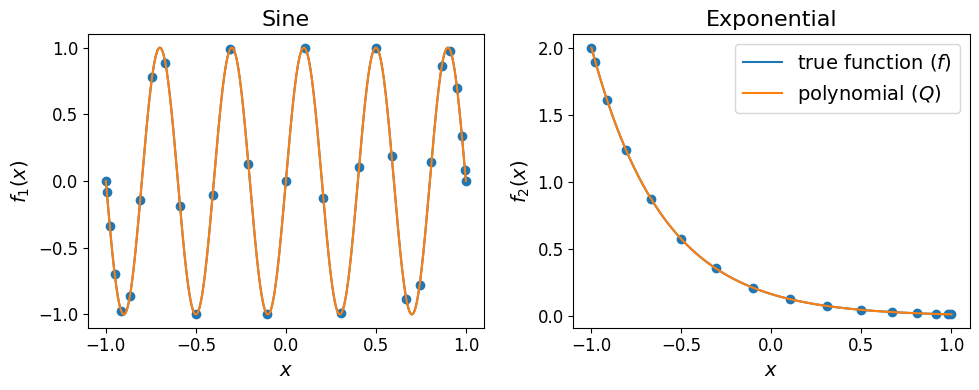

In [96]:
xx_plot = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(xx_plot, fun_1(xx_plot), label="true function")
axs[0].plot(xx_plot, poly_1(xx_plot), label="polynomial ($Q$)")
axs[0].scatter(grd_1.unisolvent_nodes[:, 0], coeffs_1)
axs[0].set_xlabel("$x$", fontsize=14);
axs[0].set_ylabel("$f_1(x)$", fontsize=14);
axs[0].set_title("Sine", fontsize=16);
axs[0].tick_params(axis='both', which='major', labelsize=12)


axs[1].plot(xx_plot, fun_2(xx_plot), label="true function ($f$)")
axs[1].plot(xx_plot, poly_2(xx_plot), label="polynomial ($Q$)")
axs[1].scatter(grd_2.unisolvent_nodes[:, 0], coeffs_2)
axs[1].set_xlabel("$x$", fontsize=14);
axs[1].set_ylabel("$f_2(x)$", fontsize=14);
axs[1].set_title("Exponential", fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(fontsize=14)

fig.tight_layout()

The plots show that are no notable differences between the two true functions and their corresponding interpolating polynomials.

---

With the two interpolating polynomials defined, you are now ready to do some arithmetic operations with them.

## Addition and subtraction

Minterpy polynomials may be added or subtracted by a real scalar number; this operation returns another polynomial.

For instance:

In [45]:
poly_scalar_add = poly_1 + 5
poly_scalar_add

or:

In [46]:
poly_scalar_sub = poly_1 - 5
poly_scalar_sub

Adding (resp. subtracting) a real scalar number uniformly shifts the polynomial up (resp. down):

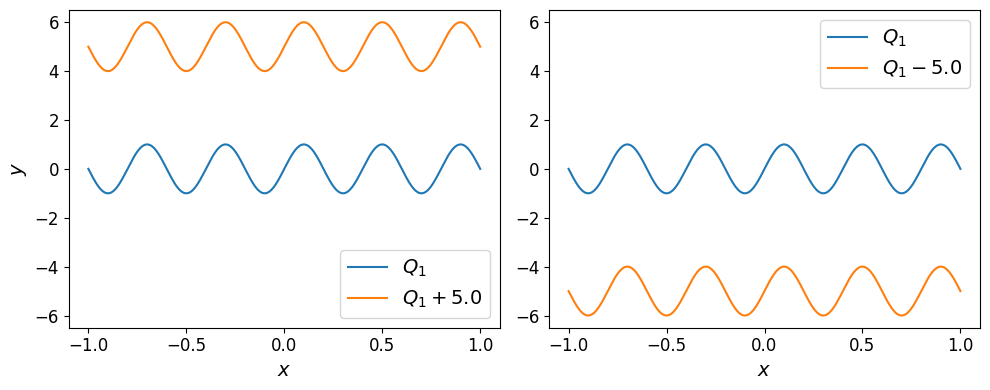

In [92]:
xx_plot = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(xx_plot, poly_1(xx_plot), label="$Q_1$")
axs[0].plot(xx_plot, poly_scalar_add(xx_plot), label="$Q_1 + 5.0$")
axs[0].set_xlabel("$x$", fontsize=14)
axs[0].set_ylabel("$y$", fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend(fontsize=14, loc="lower right")
axs[0].set_ylim([-6.5, 6.5])

axs[1].plot(xx_plot, poly_1(xx_plot), label="$Q_1$")
axs[1].plot(xx_plot, poly_scalar_sub(xx_plot), label="$Q_1 - 5.0$")
axs[1].set_xlabel("$x$", fontsize=14);
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(fontsize=14, loc="upper right")
axs[1].set_ylim([-6.5, 6.5])

fig.tight_layout();

Polynomials may also be added or subtracted from each other; the result is once again another polynomial.

For instance, $Q_{\mathrm{add}} (x) = Q_1(x) + Q_2(x)$:

In [48]:
poly_add = poly_1 + poly_2
poly_add

or $Q_{\mathrm{sub}} (x) = Q_1(x) - Q_2(x)$:

In [49]:
poly_sub = poly_1 - poly_2
poly_sub

The plots of the two polynomials are shown below.

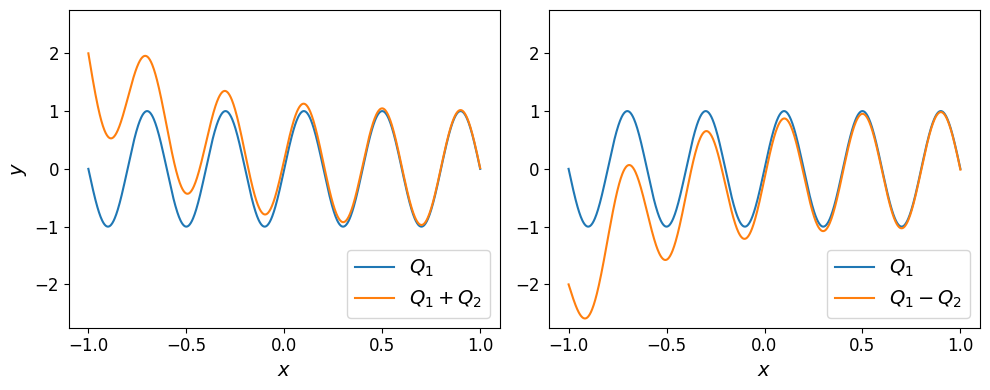

In [93]:
xx_plot = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(xx_plot, poly_1(xx_plot), label="$Q_1$")
axs[0].plot(xx_plot, poly_add(xx_plot), label="$Q_1 + Q_2$")
axs[0].set_xlabel("$x$", fontsize=14)
axs[0].set_ylabel("$y$", fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend(fontsize=14, loc="lower right")
axs[0].set_ylim([-2.75, 2.75])

axs[1].plot(xx_plot, poly_1(xx_plot), label="$Q_1$")
axs[1].plot(xx_plot, poly_sub(xx_plot), label="$Q_1 - Q_2$")
axs[1].set_xlabel("$x$", fontsize=14);
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(fontsize=14, loc="lower right")
axs[1].set_ylim([-2.75, 2.75])

fig.tight_layout();

## Multiplication

Minterpy polynomials may also be multiplied by a real scalar number; the operation returns another polynomial.

Consider $5 \times Q_2(x)$:

In [63]:
poly_scalar_mul = 5.0 * poly_2
poly_scalar_mul

Scalar multiplication uniformly and vertically stretches the polynomial across its domain as shown in the plot below.

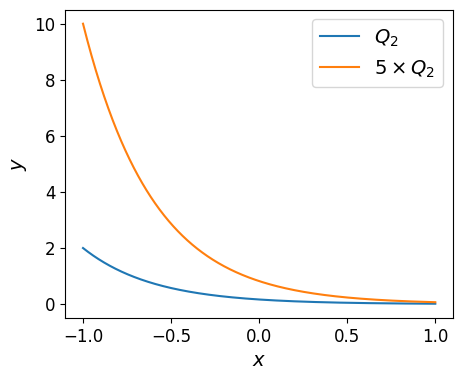

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))

ax.plot(xx_plot, poly_2(xx_plot), label="$Q_2$")
ax.plot(xx_plot, poly_scalar_mul(xx_plot), label="$5 \\times Q_2$")
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=14);

Furthermore, a multiplication between Minterpy polynomials is also a valid operation that returns a polynomial.

For instance $Q_1 \times Q_2$:

In [74]:
poly_mul = poly_1 * poly_2
poly_mul

The plot of the product polynomial is shown below:

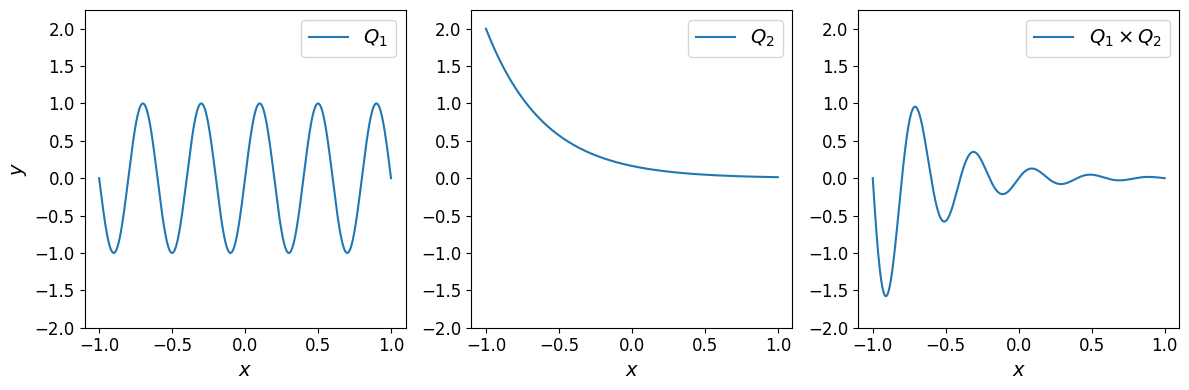

In [91]:
xx_plot = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axs[0].plot(xx_plot, poly_1(xx_plot), label="$Q_1$")
axs[0].set_xlabel("$x$", fontsize=14)
axs[0].set_ylabel("$y$", fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend(fontsize=14, loc="upper right")
axs[0].set_ylim([-2.0, 2.25])

axs[1].plot(xx_plot, poly_2(xx_plot), label="$Q_2$")
axs[1].set_xlabel("$x$", fontsize=14);
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(fontsize=14, loc="upper right")
axs[1].set_ylim([-2.0, 2.25])

axs[2].plot(xx_plot, poly_mul(xx_plot), label="$Q_1 \\times Q_2$")
axs[2].set_xlabel("$x$", fontsize=14)
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].legend(fontsize=14);
axs[2].legend(fontsize=14, loc="upper right")
axs[2].set_ylim([-2.0, 2.25])

fig.tight_layout();

As expected the product polynomial is an exponentially decaying sine function.

## Division

Minterpy polynomials may be divided by a real scalar number; this operation returns another polynomial.

For instance $Q_1(x) / 4.0$:

In [97]:
poly_scalar_div = poly_1 / 4.0
poly_scalar_div

Division by a real scalar number uniformly and vertically contracts the polynomial across its domain as shown in the plot below.

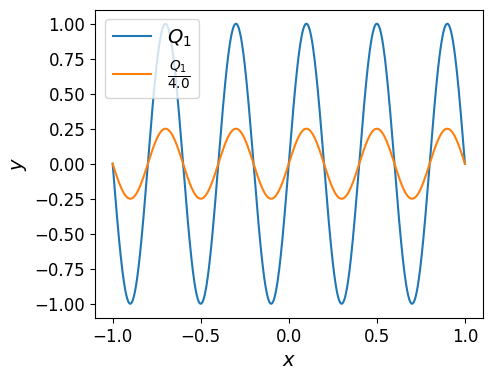

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))

ax.plot(xx_plot, poly_1(xx_plot), label="$Q_1$")
ax.plot(xx_plot, poly_scalar_div(xx_plot), label="$\\frac{Q_1}{4.0}$")
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=14);

Minterpy, however, does **not support** polynomial-polynomial division (rational function). Minterpy cannot evaluate the resulting function of the expression:

$$
Q_3(x) = \frac{Q_1(x)}{Q_2(x)}
$$

and return the resulting rational function.

```{note}
That being said, you can still evaluate the evaluation of the expression above at a given set of query points (as long as $Q_2(x) \neq 0$).
```

## Exponentiation

Finally, Minterpy polynomials may also be exponentiated by a **non-negative integer**. As all the other arithmetic operations above, polynomial exponentiation returns another polynomial.

For instance $Q_1^2(x)$:

In [109]:
poly_exp = poly_1**2
poly_exp

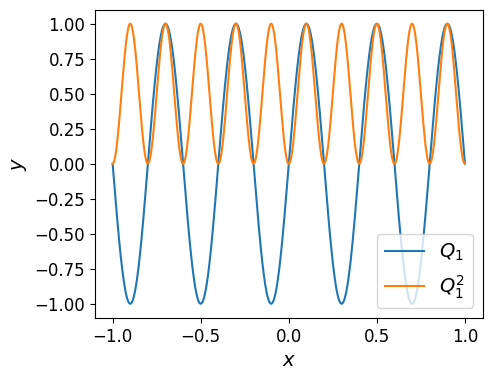

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))

ax.plot(xx_plot, poly_1(xx_plot), label="$Q_1$")
ax.plot(xx_plot, poly_exp(xx_plot), label="$Q_1^2$")
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$y$", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=14);

Polynomial exponentiation by a non-negative integer is a syntactic sugar for multiple polynomial self multiplications.

For instance, $Q_2^2(x) = Q_2(x) \times Q_2(x)$:

In [116]:
poly_2**2 == poly_2 * poly_2

True

or $Q_2^3(x) = Q_2(x) \times Q_2(x) \times Q_2(x)$:

In [117]:
poly_2**3 == poly_2 * poly_2 * poly_2

True

```{warning}
Minterpy polynomials cannot be exponentiated by another polynomial, a negative number, or a non-integer. Attempting to carry out these operations will raise an exception.
```

## Summary

In this guide, you've learned the fundamentals of arithmetic operations involving Minterpy polynomials. Minterpy polynomials are closed under the following arithmetic operations:

- Polynomial-scalar addition and subtraction
- Polynomial-polynomial addition and subtraction
- Polynomial-scalar multiplication
- Polynomial-polynomial multiplication
- Polynomial-scalar division
- Polynomial exponentiation by a non-negative integer

The term _closed under_ indicates that these operations produce another Minterpy polynomial.

Although one-dimensional polynomials are used as examples throughout the guide, Minterpy polynomials of higher dimensions behave similarly when subjected to the above operations.

It is important to note that the following operations are currently not supported by Minterpy:

- Polynomial-polynomial division (i.e., forming _rational functions_)
- Polynomial exponentiation by a real scalar

Minterpy polynomials also support several basic calculus operations, such as differentiation and integration, which will be demonstrated in the next guide.